# Directional Wells Trayectories

# Import Python Libraries

In [75]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [76]:
well_file = "Data/input/F-15/1.xml"

with open(well_file) as file:
    data = file.read()

# Data Processing

In [77]:
data_xml = BeautifulSoup(data, 'html.parser')
params = set([str(tag.name) for tag in data_xml.find_all()])
#params

In [78]:
params = []
for tag in data_xml.find_all():
    params.append(str(tag.name))

In [79]:
params = set(params)
params

{'azi',
 'aziref',
 'azivertsect',
 'commondata',
 'dispew',
 'dispewvertsectorig',
 'dispns',
 'dispnsvertsectorig',
 'dls',
 'dtimcreation',
 'dtimlastchange',
 'dtimstn',
 'dtimtrajend',
 'dtimtrajstart',
 'gridcorused',
 'incl',
 'itemstate',
 'magdeclused',
 'md',
 'mddelta',
 'mdmn',
 'mdmx',
 'name',
 'namewell',
 'namewellbore',
 'priv_customdata',
 'priv_dtimreceived',
 'priv_iplastchange',
 'priv_ipowner',
 'priv_userlastchange',
 'priv_userowner',
 'ratebuild',
 'rateturn',
 'servicecompany',
 'sourcename',
 'statustrajstation',
 'trajectory',
 'trajectorys',
 'trajectorystation',
 'tvd',
 'tvddelta',
 'typesurveytool',
 'typetrajstation',
 'vertsect'}

In [80]:
tvd_temp = data_xml.find_all('incl')

In [81]:
tvd_temp[-1].text

'0.366170069098626'

In [82]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
df = pd.DataFrame()
for col in columns:
    df[col] = [float(x.text) for x in data_xml.find_all(col)]       

In [83]:
df

,azi,incl,md,tvd,dispns,dispew
0,0.000000,0.000000,0.000000,0.000000,-3.170000,3.530000
1,0.000000,0.000000,145.899994,145.899994,-3.170000,3.530000
2,4.427726,0.002618,153.399994,153.399985,-3.172757,3.520578
3,2.548530,0.004887,234.199997,234.199627,-3.366177,3.529412
4,2.377313,0.013614,274.600006,274.597786,-3.646544,3.774881
...,...,...,...,...,...,...
75,4.469265,0.382925,3118.280029,2938.419040,-699.230295,-217.451880
76,4.471534,0.390081,3158.540039,2975.709107,-702.866857,-232.185777
77,4.470487,0.371232,3199.020020,3013.291014,-706.461696,-246.789120
78,4.460363,0.366170,3211.780029,3025.193506,-707.585751,-251.248326


In [84]:
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

prefix = 'Data/input/'
suffix = '/1.xml'

df_all_wells = pd.DataFrame()
for well in wells:
    df = pd.DataFrame()
    well_file = prefix + well + suffix
    with open(well_file) as f:
        data = f.read()
    data_xml = BeautifulSoup(data, 'html.parser')
    for col in columns:
        df[col] = [float(x.text) for x in data_xml.find_all(col)]
    df['Well'] = well
    df_all_wells = pd.concat([df_all_wells, df], ignore_index=True)

In [85]:
df_all_wells

,azi,incl,md,tvd,dispns,dispew,Well
0,0.000000,0.000000,0.000000,0.000000,3.170000,-3.530000,F-1 C
1,0.000000,0.000000,210.699997,210.699997,3.170000,-3.530000,F-1 C
2,5.275083,0.032114,237.600006,237.595383,3.400403,-3.895308,F-1 C
3,5.318018,0.033336,251.100006,251.088156,3.644096,-4.263587,F-1 C
4,5.336519,0.043110,264.899994,264.878010,3.948795,-4.693964,F-1 C
...,...,...,...,...,...,...,...
856,4.469265,0.382925,3118.280029,2938.419040,-699.230295,-217.451880,F-15
857,4.471534,0.390081,3158.540039,2975.709107,-702.866857,-232.185777,F-15
858,4.470487,0.371232,3199.020020,3013.291014,-706.461696,-246.789120,F-15
859,4.460363,0.366170,3211.780029,3025.193506,-707.585751,-251.248326,F-15


In [86]:
df_all_wells.Well.unique()

array(['F-1 C', 'F-4', 'F-5', 'F-7', 'F-9', 'F-11', 'F-12', 'F-14',
       'F-15'], dtype=object)

In [87]:
df_all_wells.loc[df_all_wells['Well'] == 'F-12', ['azi', 'Well']]

,azi,Well
475,0.000000,F-12
476,0.000000,F-12
477,2.900912,F-12
478,2.788861,F-12
479,1.976934,F-12
...,...,...
682,1.860346,F-12
683,1.867851,F-12
684,1.862964,F-12
685,1.842893,F-12


In [88]:
df_all_wells.groupby('Well')['tvd'].mean()

Well
F-1 C    1612.699136
F-11     1756.344971
F-12     1642.833575
F-14     1844.793447
F-15     1619.884283
F-4      1728.137265
F-5      1773.009943
F-7       456.369096
F-9       598.263832
Name: tvd, dtype: float64

In [89]:
df_all_wells['neg_tvd'] = df_all_wells['tvd']*-1

# Plot 3D Wells Trajectories

In [90]:
fig = px.line_3d(df_all_wells, 'dispns', 'dispew', 'neg_tvd', 'Well')
fig.show()

# Clean data (Output)

In this step, data of each well is converted into csv files.

In [120]:
prefix = 'Data/output/'
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']
suffix = '.csv'

for well in wells:
    df = df_all_wells[df_all_wells['Well'] == well]
    df.to_csv(prefix + well + suffix, index=False)

# EDA (Exploratory Data Analysis)

<AxesSubplot:>

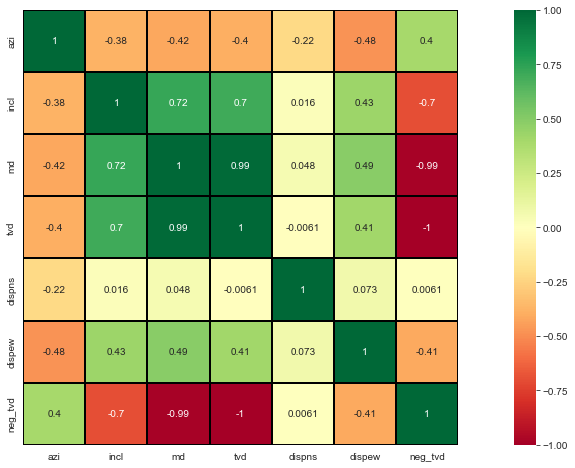

In [91]:
corr = df_all_wells.corr()

fig, ax1 = plt.subplots(figsize=(20,8))
sns.heatmap(data=corr, cmap='RdYlGn', annot=True, linewidths=0.01, linecolor='black', square=True, ax=ax1)

## Plots for Categorical Variables

ConversionError: Failed to convert value(s) to axis units: 'ticks'

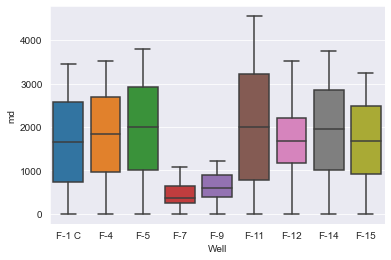

In [92]:
ax = sns.boxplot(data=df_all_wells, x='Well', y='md')
ax.set_xticks('ticks', rotation = 45)

In [ ]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
fig, ax = plt.subplots(len(columns), 1, figsize=(8,20))

for col, axes in zip(columns, ax):
    sns.boxplot(data=df_all_wells, x='Well', y=col, ax=axes)
    plt.tight_layout()